In [1]:
import yaml
from easydict import EasyDict as edict
import os
import torch

In [2]:
config_path = './config_test.yaml'

# load model-3: trained with prior channel 
# config_path = '../config/model_mobilenetv2_with_prior_channel.yaml'

with open(config_path,'rb') as f:
        cf = yaml.load(f, Loader=yaml.FullLoader)
    
print ('===========> loading data <===========')
exp_args = edict()

exp_args.task = cf['task'] # only support 'seg' now
exp_args.datasetlist = cf['datasetlist']
exp_args.model_root = cf['model_root'] 
exp_args.data_root = cf['data_root']
exp_args.file_root = cf['file_root']
# the height of input images, default=224
exp_args.input_height = cf['input_height']
# the width of input images, default=224
exp_args.input_width = cf['input_width']

# if exp_args.video=True, add prior channel for input images, default=False
exp_args.video = cf['video']
# the probability to set empty prior channel, default=0.5
exp_args.prior_prob = cf['prior_prob']

# whether to add boundary auxiliary loss, default=False
exp_args.addEdge = cf['addEdge']
# the weight of boundary auxiliary loss, default=0.1
exp_args.edgeRatio = cf['edgeRatio']
# whether to add consistency constraint loss, default=False
exp_args.stability = cf['stability']
# whether to use KL loss in consistency constraint loss, default=True
exp_args.use_kl = cf['use_kl']
# temperature in consistency constraint loss, default=1
exp_args.temperature = cf['temperature'] 
# the weight of consistency constraint loss, default=2
exp_args.alpha = cf['alpha'] 

# input normalization parameters
exp_args.padding_color = cf['padding_color']
exp_args.img_scale = cf['img_scale']
# BGR order, image mean, default=[103.94, 116.78, 123.68]
exp_args.img_mean = cf['img_mean']
# BGR order, image val, default=[1/0.017, 1/0.017, 1/0.017]
exp_args.img_val = cf['img_val'] 

# whether to use pretian model to init portraitnet
exp_args.istrain = False
exp_args.init = False
exp_args.resume = True

# if exp_args.useUpsample==True, use nn.Upsample in decoder, else use nn.ConvTranspose2d
exp_args.useUpsample = cf['useUpsample'] 
# if exp_args.useDeconvGroup==True, set groups=input_channel in nn.ConvTranspose2d
exp_args.useDeconvGroup = cf['useDeconvGroup'] 


print ('finish load config file ...')

===========> loading data <===========
finish load config file ...


In [3]:
from potraitnet import PotraitNet

netmodel = PotraitNet( n_class=2, 
                        useUpsample=exp_args.useUpsample, 
                        useDeconvGroup=exp_args.useDeconvGroup, 
                        addEdge=exp_args.addEdge, 
                        channelRatio=1.0, 
                        minChannel=16, 
                        weightInit=True,
                        video=exp_args.video).cuda()

if exp_args.resume:
    bestModelFile = os.path.join(exp_args.model_root, 'model_best.pth.tar')
    if os.path.isfile(bestModelFile):
        checkpoint = torch.load(bestModelFile, weights_only=False)
        netmodel.load_state_dict(checkpoint['state_dict'])
        print ("minLoss: ", checkpoint['minLoss'], checkpoint['epoch'])
        print("=> loaded checkpoint '{}' (epoch {})".format(bestModelFile, checkpoint['epoch']))
    else:
        print("=> no checkpoint found at '{}'".format(bestModelFile))
netmodel = netmodel.cuda()

c:\Users\Bryan Delton\OneDrive - CUHK-Shenzhen\School Files\Year 4 Term 1\CSC6051\Assignment\assignment1\task3\potraitnet.py:236: FutureWarning: `nn.init.kaiming_normal` is now deprecated in favor of `nn.init.kaiming_normal_`.
  nn.init.kaiming_normal(m.weight.data)


minLoss:  0.04693455999151186 235
=> loaded checkpoint './output/model_best.pth.tar' (epoch 235)


In [4]:
import cv2
import numpy as np
import torch
from torch.autograd import Variable
import torch.nn as nn
import matplotlib.pyplot as plt

def test_custom(path="./custom_image_1.jpg"):
    # Load and preprocess the image
    img = cv2.imread(path)
    img = np.uint8(img)
    input_norm = cv2.resize(img, (224, 224), interpolation=cv2.INTER_CUBIC)

    # Transpose and prepare for model input
    input = np.transpose(input_norm, (2, 0, 1))
    input_tensor = torch.from_numpy(input).float()
    input_tensor = input_tensor.unsqueeze(0)
    input_ori_var = Variable(input_tensor.cuda())

    # Pass the input through the model
    output_mask = netmodel(input_ori_var)

    # Apply softmax and thresholding
    softmax = nn.Softmax(dim=1)
    prob = softmax(output_mask)[0, 1, :, :]
    pred = prob.data.cpu().numpy()
    pred[pred > 0.5] = 1
    pred[pred <= 0.5] = 0

    # Display both the original image and the predicted mask side by side
    plt.figure(figsize=(10, 5))

    # Original Image
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(input_norm, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB
    plt.title('Original Image')
    plt.axis('off')  # Hide axis for a cleaner look

    # Predicted Mask
    plt.subplot(1, 2, 2)
    plt.imshow(pred, cmap='gray')  # Display as grayscale
    plt.title('Predicted Mask')
    plt.axis('off')  # Hide axis for a cleaner look

    # Show the images
    plt.tight_layout()
    plt.show()


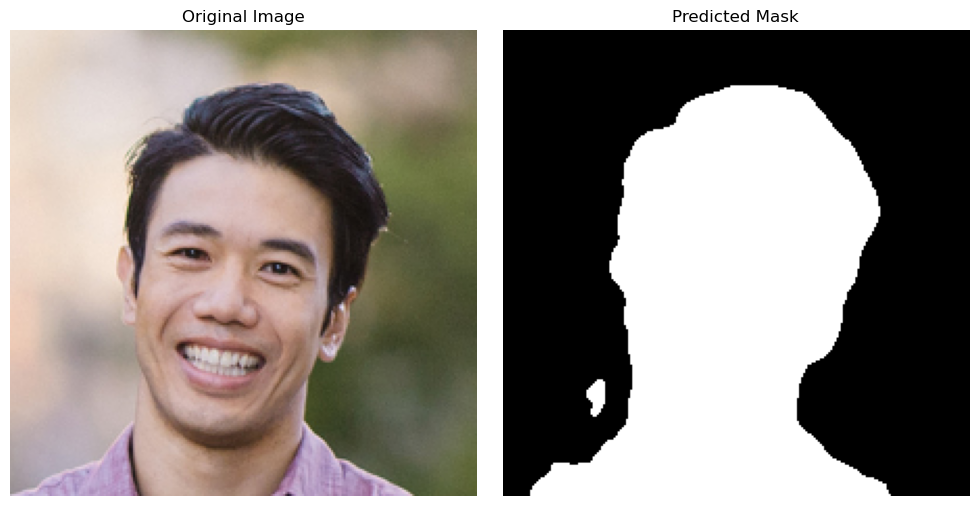

In [5]:
test_custom()

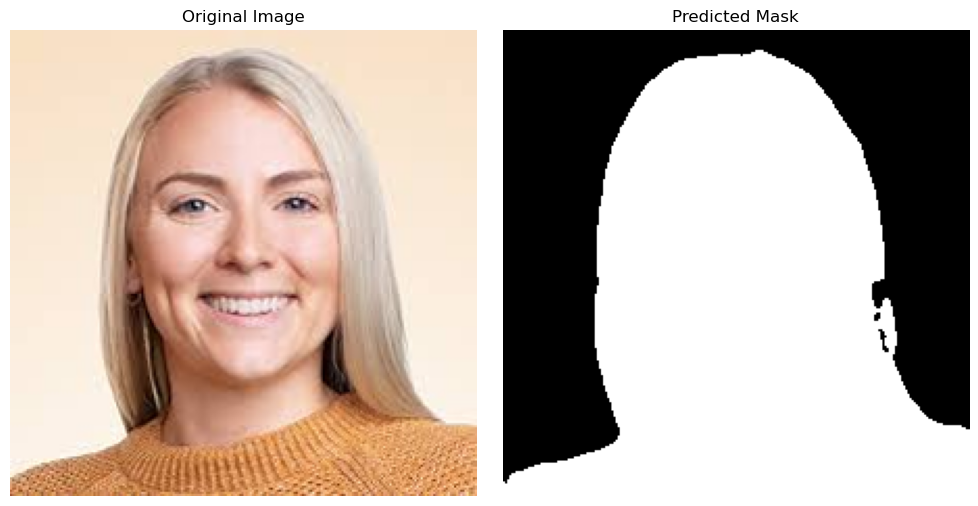

In [6]:
test_custom("./custom_image_2.jpg")

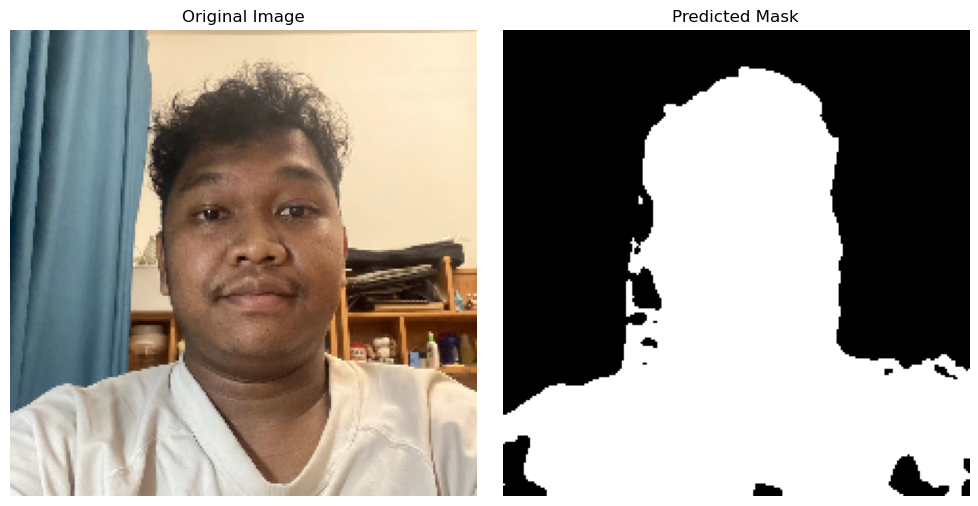

In [7]:
test_custom("./personal_image.jpg")

## Mattinghuman

In [8]:
# Mattinghuman

from potraitnet import PotraitNet

netmodel = PotraitNet( n_class=2, 
                        useUpsample=exp_args.useUpsample, 
                        useDeconvGroup=exp_args.useDeconvGroup, 
                        addEdge=exp_args.addEdge, 
                        channelRatio=1.0, 
                        minChannel=16, 
                        weightInit=True,
                        video=exp_args.video).cuda()

if exp_args.resume:
    bestModelFile = os.path.join(exp_args.model_root, 'model_best_mattinghuman.pth.tar')
    if os.path.isfile(bestModelFile):
        checkpoint = torch.load(bestModelFile, weights_only=False)
        netmodel.load_state_dict(checkpoint['state_dict'])
        print ("minLoss: ", checkpoint['minLoss'], checkpoint['epoch'])
        print("=> loaded checkpoint '{}' (epoch {})".format(bestModelFile, checkpoint['epoch']))
    else:
        print("=> no checkpoint found at '{}'".format(bestModelFile))
netmodel = netmodel.cuda()

c:\Users\Bryan Delton\OneDrive - CUHK-Shenzhen\School Files\Year 4 Term 1\CSC6051\Assignment\assignment1\task3\potraitnet.py:236: FutureWarning: `nn.init.kaiming_normal` is now deprecated in favor of `nn.init.kaiming_normal_`.
  nn.init.kaiming_normal(m.weight.data)


minLoss:  0.04987040866872339 11
=> loaded checkpoint './output/model_best_mattinghuman.pth.tar' (epoch 11)


In [9]:
import cv2
import numpy as np
import torch
from torch.autograd import Variable
import torch.nn as nn
import matplotlib.pyplot as plt

def test_custom(path="./custom_image_1.jpg"):
    # Load and preprocess the image
    img = cv2.imread(path)
    img = np.uint8(img)
    input_norm = cv2.resize(img, (224, 224), interpolation=cv2.INTER_CUBIC)

    # Transpose and prepare for model input
    input = np.transpose(input_norm, (2, 0, 1))
    input_tensor = torch.from_numpy(input).float()
    input_tensor = input_tensor.unsqueeze(0)
    input_ori_var = Variable(input_tensor.cuda())

    # Pass the input through the model
    output_mask = netmodel(input_ori_var)

    # Apply softmax and thresholding
    softmax = nn.Softmax(dim=1)
    prob = softmax(output_mask)[0, 1, :, :]
    pred = prob.data.cpu().numpy()
    pred[pred > 0.5] = 1
    pred[pred <= 0.5] = 0

    # Display both the original image and the predicted mask side by side
    plt.figure(figsize=(10, 5))

    # Original Image
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(input_norm, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB
    plt.title('Original Image')
    plt.axis('off')  # Hide axis for a cleaner look

    # Predicted Mask
    plt.subplot(1, 2, 2)
    plt.imshow(pred, cmap='gray')  # Display as grayscale
    plt.title('Predicted Mask')
    plt.axis('off')  # Hide axis for a cleaner look

    # Show the images
    plt.tight_layout()
    plt.show()


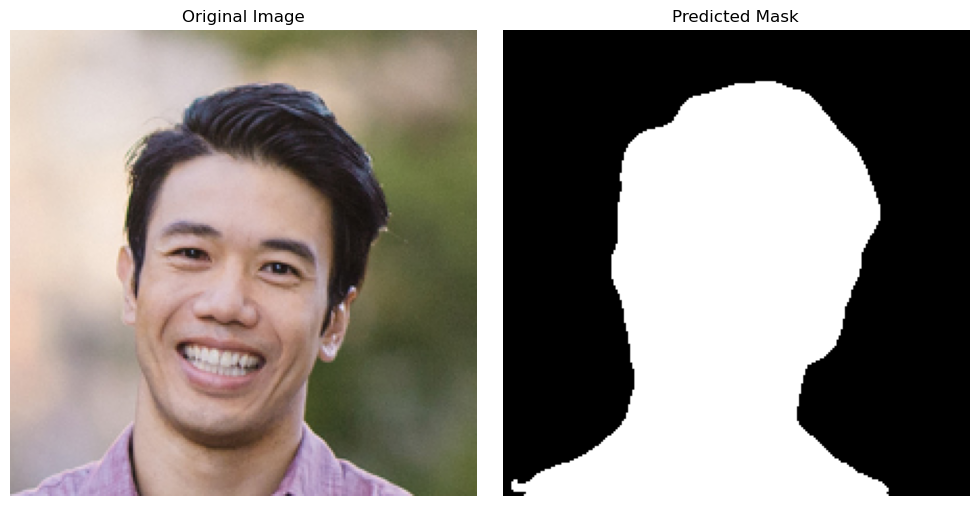

In [11]:
test_custom()

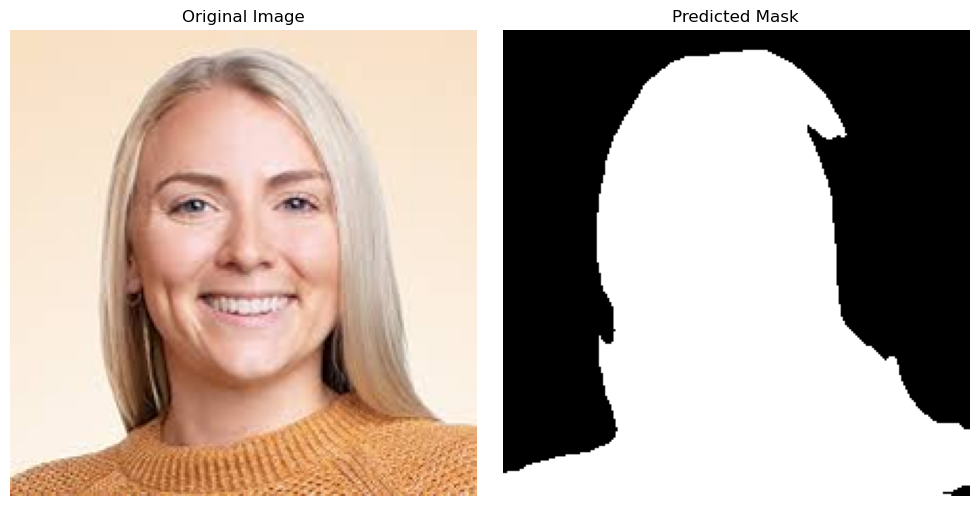

In [10]:
test_custom("./custom_image_2.jpg")

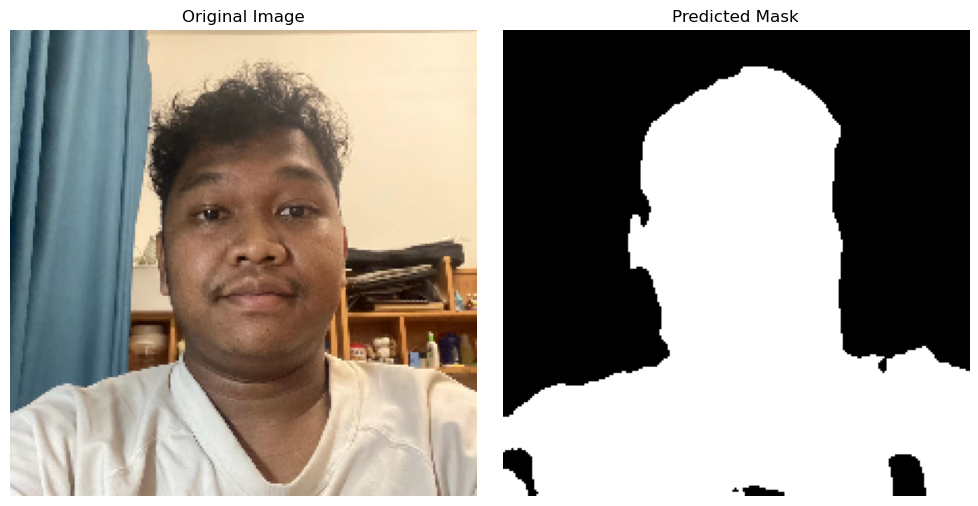

In [12]:
test_custom('./personal_image.jpg')